# Cluster-Based Strategy Recommendations


* Use K-Means or DBSCAN clustering on previous client embeddings
* For each cluster:
    * Recommend Recovery Strategy: SMS-first, Call-first, Trace-first
Create Action Playbooks per cluster.


- Tier 1 – Low Risk	✅ 📲 SMS First	Cheap, efficient, and client is likely to respond
- Tier 2 – Medium Risk	✉️ 📧 Email Reminder	Still reachable, may need soft push
- Tier 2 or 3 (blurred)	☎️ 📞 Call First	Harder to nudge, needs direct voice contact
- Tier 3 – High Risk	🕵️ Trace First	Unreachable, bad scores, wrong address — must verify manually

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# client embeddings
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/clients_embeddings_with_risk_tier.csv")

# KMeans Clustering on embeddings
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Embed_X', 'Embed_Y']])

# Recoverying Strategy per cluster
strategy_map = {
    0: '📲 SMS (Low Risk, Tier-1)', 
    1: '📞 Call First (Medium/High Risk, Tier- 2 or 3)',
    2: '🕵️ Trace First (High Risk, Tier-3)',
    3: '📧 Email Reminder (Medium Risk, tier-2)'
}

df['Recovery Strategy'] = df['Cluster'].map(strategy_map)

#  result
df.to_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/clients_with_Kmeans_cluster_strategies.csv", index=False)


/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/2v/054zj6gs6m521sf_2_t9pdjw0000gn/T/ipykernel_6993/2043243417.py:40: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from current font.
  plt.tight_layout()
/var/folders/2v/054zj6gs6m521sf_2_t9pdjw0000gn/T/ipykernel_6993/2043243417.py:40: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from current font.
  plt.tight_layout()
/var/folders/2v/054zj6gs6m521sf_2_t9pdjw0000gn/T/ipykernel_6993/2043243417.py:40: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from current font.
  plt.tight_layout()
/var/folders/2v/054zj6gs6m521sf_2_t9pdjw0000gn/T/ipykernel_6993/2043243417.py:40: UserWarning: Glyph 128373 (\N{SLEUTH OR SPY}) missing from current font.
  plt.tight_layout()
/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rg/M

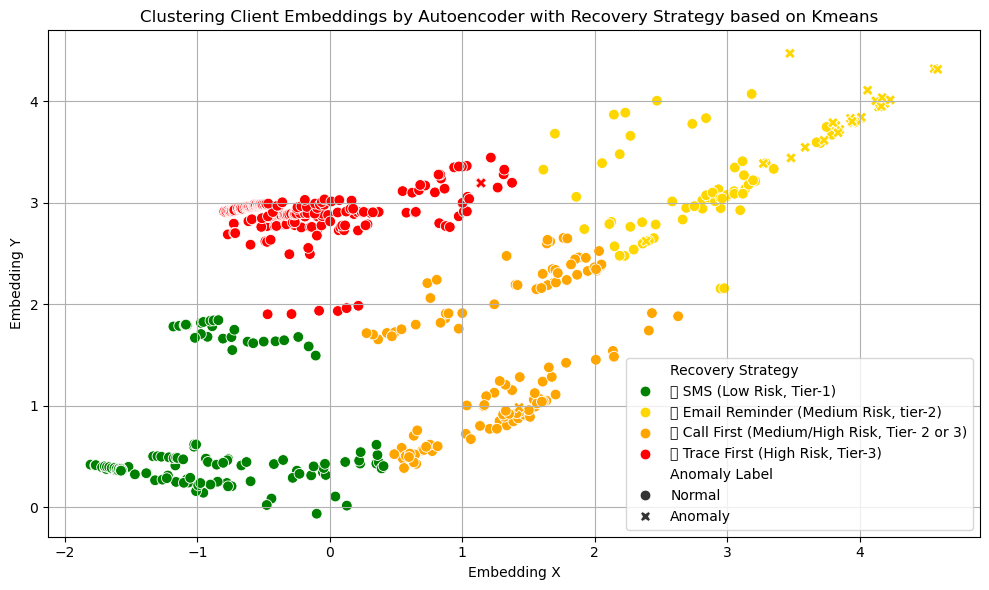

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  data
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/clients_with_Kmeans_cluster_strategies.csv")

# palette keys 
strategy_palette = {
    '📲 SMS (Low Risk, Tier-1)': 'green',
    '📧 Email Reminder (Medium Risk, tier-2)': 'gold',
    '📞 Call First (Medium/High Risk, Tier- 2 or 3)': 'orange',
    '🕵️ Trace First (High Risk, Tier-3)': 'red'
}

strategy_order = [
    '📲 SMS (Low Risk, Tier-1)',
    '📧 Email Reminder (Medium Risk, tier-2)',
    '📞 Call First (Medium/High Risk, Tier- 2 or 3)',
    '🕵️ Trace First (High Risk, Tier-3)'
]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Embed_X',
    y='Embed_Y',
    hue='Recovery Strategy',
    hue_order=strategy_order,
    palette=strategy_palette,
    style='Anomaly Label',
    s=60
)

plt.title("Clustering Client Embeddings by Autoencoder with Recovery Strategy based on Kmeans  ")
plt.xlabel("Embedding X")
plt.ylabel("Embedding Y")
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from current font.
  fig.canvas.draw()
/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from current font.
  fig.canvas.draw()
/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from current font.
  fig.canvas.draw()
/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128373 (\N{SLEUTH OR SPY}) missing from current font.
  fig.canvas.draw()
/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from current font.
  fig.canvas.print_figure

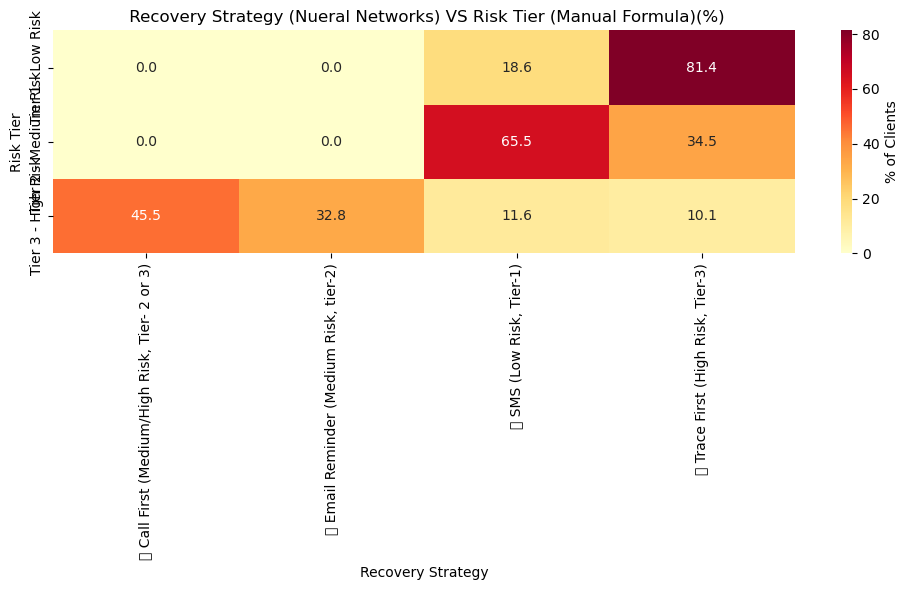

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/clients_with_Kmeans_cluster_strategies.csv")

# percentage breakdown between Action Tier and Strategy
cross_tab = pd.crosstab(df['Action_Tier'], df['Recovery Strategy'], normalize='index') * 100
cross_tab = cross_tab.round(1)

# result
cross_tab.to_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/Kmeans_vs_action_risk_tier.csv")

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': '% of Clients'})
plt.title(" Recovery Strategy (Nueral Networks) VS Risk Tier (Manual Formula)(%)")
plt.xlabel("Recovery Strategy")
plt.ylabel("Risk Tier")
plt.tight_layout()
plt.show()


In [17]:

import pandas as pd

data = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Client_Embeddings_NN/Kmeans_vs_action_risk_tier.csv")

display(data)

,Action_Tier,"📞 Call First (Medium/High Risk, Tier- 2 or 3)","📧 Email Reminder (Medium Risk, tier-2)","📲 SMS (Low Risk, Tier-1)","🕵️ Trace First (High Risk, Tier-3)"
0,Tier 1 - Low Risk,0.0,0.0,18.6,81.4
1,Tier 2 - Medium Risk,0.0,0.0,65.5,34.5
2,Tier 3 - High Risk,45.5,32.8,11.6,10.1




| **Action_Tier**         | ☎️ Call First (Tier 2 or 3) | 📧 Email Reminder (Tier 2) | 📱 SMS (Tier 1) | 🕵️ Trace First (Tier 3) |
|-------------------------|-----------------------------:|-----------------------------:|----------------:|--------------------------:|
| Tier 1 – Low Risk       | 0.0                         | 0.0                         | **18.6**        | 81.4                      |
| Tier 2 – Medium Risk    | 0.0                         | 0.0                         | **65.5**        | 34.5                      |
| Tier 3 – High Risk      | **45.5**                    | 32.8                        | 11.6            | **10.1**                  |




- 80% of manually tagged low-risk clients were flagged by the neural model for tracing. 
- This highlights how traditional rules might overlook contactability — and why unsupervised embeddings add real value. 
- I suggeste further tracing review or enrichment for these clients.

### 1. Why around 80% Tier 1 (Low Risk) clients being marked for Trace?

- Our rule-based Action Tier says: "Low arrears, high scores → Low Risk".
- But the neural embeddings see something else:
- These clients might have missing contact info (no mobile/email).
- They may have inconsistent patterns (e.g. good score, but weird residency).
- So even though they look “low risk” in our manual score they are hard to reach.

#### So thats why NN model suggests “Trace First” — not because they won’t pay, but because we can’t reach them easily.

### 2. Why are Tier 3 (High Risk) clients not being marked for Trace?

- Tier 3 clients (by score) have high arrears, low scores.
- But if they still have valid contact (mobile, email), they may be either in financial distress, but reachable (or) Potentially responsive to Call or Email, rather than full tracing.

#### So thats why NN model clusters them with others who are reachable — and suggests a more cost-effective action.